In [575]:
%matplotlib inline
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [576]:
print os.listdir(".")

['.DS_Store', '.ipynb_checkpoints', '1246431088.03.jpg', '1246431174.01.jpg', '1246431343.25.jpg', '1246431366.97.jpg', '1246431382.69.jpg', '1246431420.91.jpg', '1246431434.52.jpg', '1246435066.32.jpg', '1246435083.12.jpg', 'Archive.zip', 'vision.ipynb']


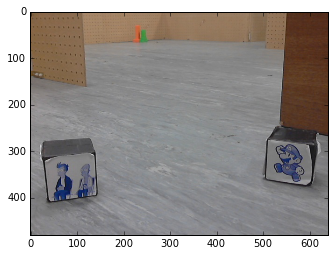

In [577]:
img = cv2.imread('1246431088.03.jpg')
# print img
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [578]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

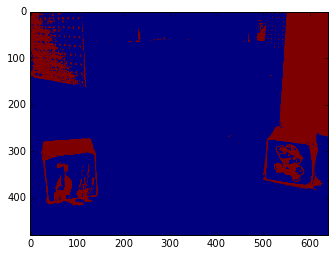

In [579]:
plt.imshow(thresh);
plt.show()

In [588]:
orb = cv2.ORB_create()
kp, des = orb.compute(img, kp)
print len(des)
img2 = cv2.drawKeypoints(img,kp,None,color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()

NameError: name 'mario' is not defined

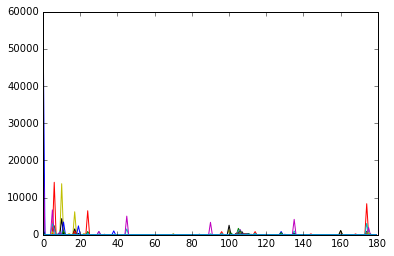

190


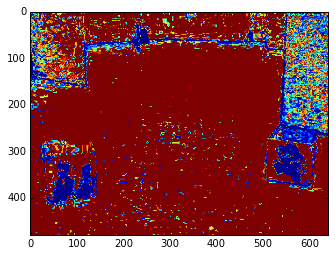

In [581]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
# norm_hist = hist / sum(hist)
dst = cv2.calcBackProject([hsv],[0, 1],hist,[0, 180, 0, 256],1)

plt.plot(hist)
plt.show()
plt.imshow(dst)
print (dst[1,1])

In [582]:
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# ret,thresh = cv2.threshold(gray,127,255,0)
# contours,hier = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# for cnt in contours:
#     if cv2.contourArea(cnt)>5000:  # remove small areas like noise etc
#         hull = cv2.convexHull(cnt)    # find the convex hull of contour
#         hull = cv2.approxPolyDP(hull,0.1*cv2.arcLength(hull,True),True)
#         if len(hull)==4:
#             cv2.drawContours(img,[hull],0,(0,255,0),2)

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

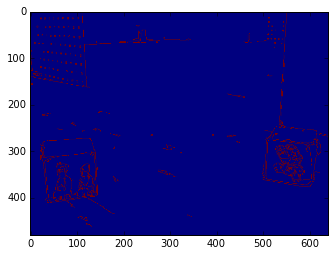

In [583]:
gimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gimg = cv2.GaussianBlur(img, (7,7), 2.)
edge = Canny(img, 50, 150)
plt.imshow(edge)
plt.show()

1


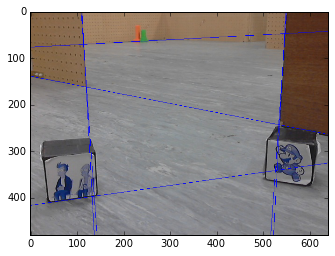

In [587]:
lines = cv2.HoughLines(edge, 1, np.pi/180,150)
print len(lines)
for line in lines:
    rho,theta = (line[0].tolist())
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),1)
plt.imshow(img)
plt.show()

In [585]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

opening = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel)



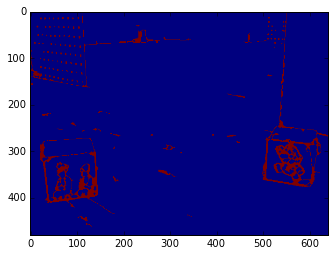

In [586]:
plt.imshow(opening)
plt.show()